<a href="https://colab.research.google.com/github/RodriCalle/ComplejidadAlgoritmica/blob/main/5_Backtracking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Backtracking

##String matching

In [1]:
def stringMatching(string, substring):
  n = len(string)
  l = len(substring)
  results = []
  for i in range(n - l):
    if (substring == string[i:i+l]):
      results.append(i)
  return results

print(stringMatching("abracadabracalamazoo", "rac"))

[2, 9]


##N-reinas

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def draw(board):
  n = len(board)
  table = np.zeros((n,n,3))
  table += 0.6
  table[::2, ::2] = 1
  table[1::2, 1::2] = 1

  fig, ax = plt.subplots()
  ax.imshow(table, interpolation='nearest')
  
  for y, x in enumerate(board):
    ax.text(x,y,u"\u265B", size=30, ha='center', va='center')

  ax.set(xticks=[],yticks=[])
  ax.axis('image')

  plt.show()

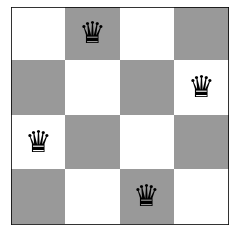

In [3]:
draw([1,3,0,2])

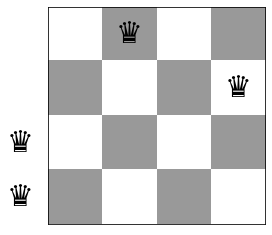

In [4]:
draw([1,3,-1,-1])

In [5]:
def isLegal(board, row, column):
  n = len(board)
  for i in range(row):
    #Rule 1: arriba o abajo
    if board[i] == column:
      return False
    #Rule 2: diagonales
    dif = row - i
    if board[i] + dif == column or board[i] - dif == column:
      return False
  return True

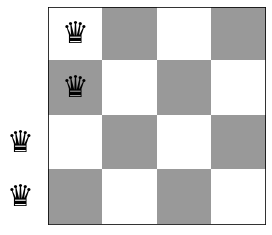

False

In [6]:
draw([0, 0, -1, -1])
isLegal([0, -1, -1, -1], 1, 0)

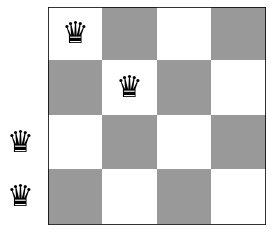

False

In [7]:
draw([0, 1, -1, -1])
isLegal([0, -1, -1, -1], 1, 1)

In [8]:
def nqueens(board, row):
  n = len(board)
  if row < n:     #if row < len(board):
    for column in range(n):
      if isLegal(board, row, column):
        board[row] = column
        nqueens(board, row + 1)
  else:
    draw(board)

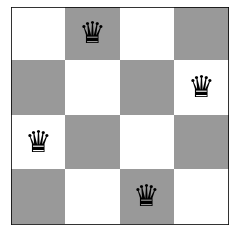

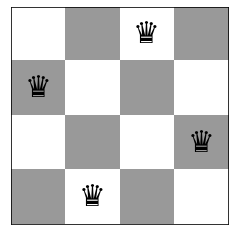

In [9]:
n = 4
nqueens([-1]*n, 0)

##Maze Solver (Recursive)

In [20]:
!git clone https://github.com/RodriCalle/ComplejidadAlgoritmica
import ComplejidadAlgoritmica.mazebuilder as mb

Cloning into 'ComplejidadAlgoritmica'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 24 (delta 10), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (24/24), done.


In [21]:
import matplotlib.pyplot as plt

def drawMaze(maze):
  _,ax = plt.subplots(figsize=(20,20))
  ax.imshow(maze)
  ax.axis("off")

In [22]:
maze = mb.makeMaze(60,120)
maze

array([[0., 0., 0., ..., 0., 0., 0.],
       [3., 1., 1., ..., 1., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 1., 3.],
       [0., 0., 0., ..., 0., 0., 0.]])

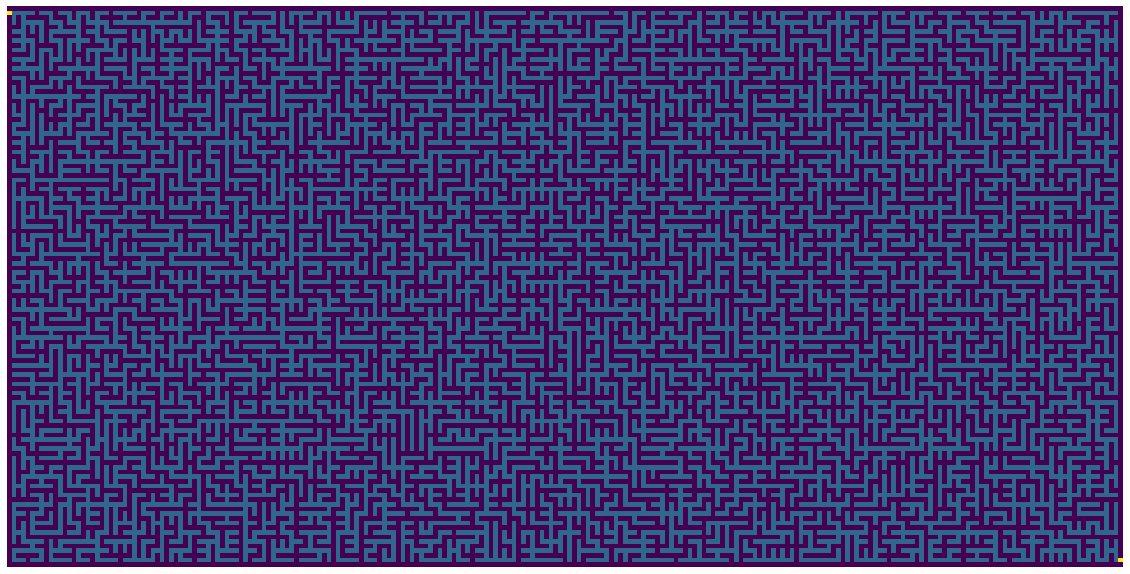

In [23]:
drawMaze(maze)

In [26]:
def mazeSolution(maze, row, col, rowf, colf):
  maze[row][col] = 3                #camino amarillo
  if row == rowf and col == colf:
    return True
  
  for r, c in [(row-1, col), (row, col+1), (row+1, col), (row, col-1)]:
    if maze[r][c] == 1 and mazeSolution(maze, r, c, rowf, colf):
      return True

  maze[row][col] = 2              # camino sin salida (verde)
  return False

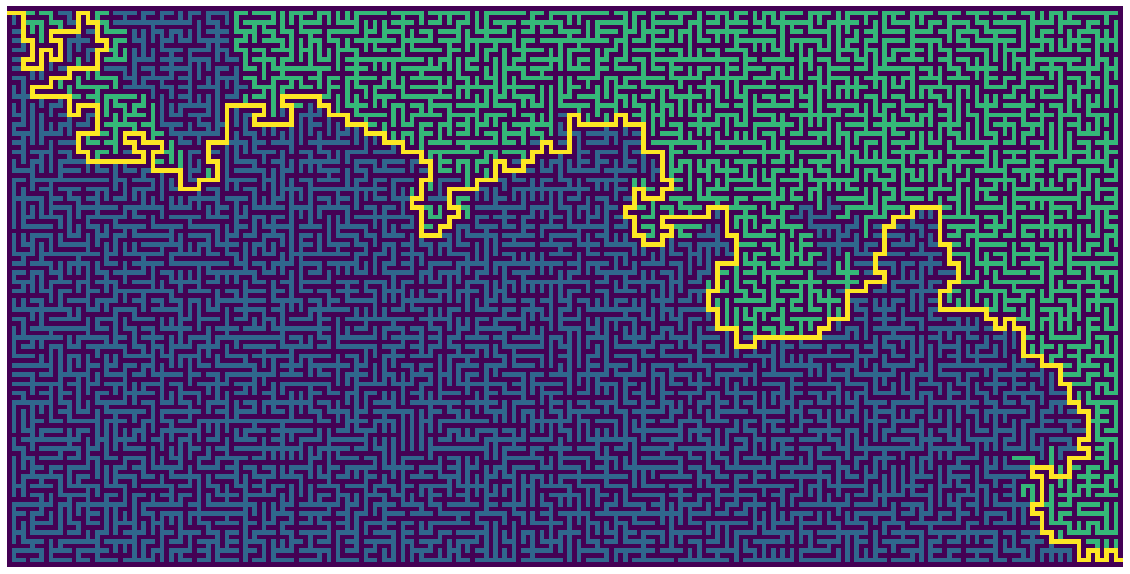

In [27]:
#Initial Position 1,1
#Final Position
rows, cols = maze.shape # matriz de numpy, sino, sería len(maze), len(maze[0])
mazeSolution(maze, 1, 1, rows - 2, cols - 2)
drawMaze(maze)